<a/ id='top'></a>
# Homework 2: Introduction to Probability and Simulation 
***

**Name**: 

***

This assignment is due on Moodle by **5 PM on Friday September 28**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**. 

**NOTES**: 

- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code.
- Because you can technically evaluate notebook cells in a non-linear order, it's a good idea to do Cell $\rightarrow$ Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected.
- Leave all of your code cells executed and the output displayed before submitting your final notebook. That way, we do not need to re-run all of the simulations, which can be time-consuming.
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) | [Problem 4](#p4) | [Problem 5](#p5) | [Challenge!](#ch)

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

***
<a/ id='p1'></a>
[Back to top](#top)

### [20 points] Problem 1

To play a game, you have a bag containing 28 fair [four-sided dice](https://en.wikipedia.org/wiki/Four-sided_die), with faces `{1,2,3,4}`.  This bag also contains 10 fair six-sided dice (faces `{1,2,3,4,5,6}`) and 2 fair twenty-sided dice (faces `{1,2,3,4,...,19,20}`).  Call these 3 classes of die "Four", "Six" and "Twenty" (or F, S, and T, for short).  You grab one die at random from the box.  

Work the following problems by hand unless otherwise stated (but don't be afraid to simulate to check your result!). 

**Part A**: You roll your die one time.  What is the probability of the event $R_5$, that you roll a 5?  Include at least 4 decimal places in your answer.

In [2]:
# P(R5) = P(R5|D4)P(D4) + P(R5|D6)P(D6) + P(R5|D20)P(D20)
R5 = (0.0/4.0)*(28.0/40.0) + (1.0/6.0)*(10.0/40.0) + (1.0/20.0)*(2.0/40.0)
print("The probability of rolling a 5 when selecting a die at random is {:0.3}".format(R5))

The probability of rolling a 5 when selecting a die at random is 0.0442


**Part B**: Suppose you roll a 5.  What is the probability that the die you chose from the box is a Six-sided die? 

In [3]:
# P(D6|R5) = (P(R5|D6)P(D6)) / P(R5)
D6R5 = (1.0/6.0)*(10.0/40.0) / R5
print("The probability of having a D6 given that you rolled a 5 is {:0.4}".format(D6R5))

The probability of having a D6 given that you rolled a 5 is 0.9434


**Part C:**  Are the events $R_5$ and $S$ independent?  Justify your answer **using math**.

If $S$ and $R_5$ are independent, then $P(R_5|S) = P(R_5)$ and $P(S|R_5) = P(S)$.  
From the calculations above, $P(R_5) = 0.0442 \neq P(R_5|S) = 0.1666$  
Similarly, $P(S) = 0.25 \neq P(S|R_5) = 0.9434$  
$S$ and $R_5$ are not independent

**Part D:**  Suppose you roll your die $n$ times and record each outcome.  Obviously, if you roll 5 or 6 you know you did *not* pick a Four-sided die, and if you roll a 7 or higher, you must have picked a Twenty-sided die.

But, if you roll $n$ times in a row and get only 1, 2, 3 or 4, you would have a stronger belief that you in fact grabbed one of the Four-sided dice.  Let $E_n$ be the event that you roll $n$ rolls of 1, 2, 3 or 4 in a row.  For example, one outcome in $E_3$ is the sequence 2, 3, 1.

Given that you roll a single value of 1, 2, 3 or 4, what is the probability that you have grabbed a Four-sided die?  That is, calculate **by hand** $P(F \mid E_1)$.

In [4]:
# P(F|E1) = P(E1|F)P(F) / (P(E1|F)P(F) + P(E1|S)P(S) + P(E1|T)P(T)
FE1 = (1.0) * (28.0/40.0) / ((1.0) * (28.0/40.0) + (4.0/6.0)*(10.0/40.0) + (4.0/20.0)*(2.0/40.0))
print("The probability that the die is four sided given that you rolled a 1,2,3 or 4 is {:0.4}".format(FE1))

The probability that the die is four sided given that you rolled a 1,2,3 or 4 is 0.7985


**Part E**:  

First, work out **by hand** a formula for the probability in general that you are rolling a Four-sided die, given that you have rolled $n$ values in a row that are 1, 2, 3 or 4 (that is, $E_n$).  So you want a formula for $P(F \mid E_n)$ in terms of $n$.

Then, define a function `prob_four` to calculate $P(F \mid E_n)$.  This function should only take one positive integer argument, $n$.

Verify that your function is performing as expected by checking your answer to **Part C**.

In [5]:
def prob_four(n):
    FEn = (1.0)**n*(28.0/40.0) / ((1.0)**n*(28.0/40.0) + (4.0/6.0)**n*(10.0/40.0) + (4.0/20.0)**n*(2.0/40.0))
    return FEn

for i in range(1,10):
    print("The probability when n = {} is {:0.6}.".format(i, prob_four(i)))

The probability when n = 1 is 0.798479.
The probability when n = 2 is 0.860891.
The probability when n = 3 is 0.903839.
The probability when n = 4 is 0.934002.
The probability when n = 5 is 0.955061.
The probability when n = 6 is 0.969595.
The probability when n = 7 is 0.979524.
The probability when n = 8 is 0.986256.
The probability when n = 9 is 0.990795.


If $F$ and $E_n$ where independent, then $P(F|E_n) = P(F)$ and would be the same for all n.  
Because the probability changes with each iteration of n, $F$ and $E_n$ are not independent.

**Part F:**  What is the smallest value of $n$ successive rolls of 1, 2, 3 or 4 that would make you believe that there's a better-than-95% chance that the die you grabbed is Four-sided?  Plugging larger and larger values for $n$ into your `prob_four` function is a very reasonable way to check this.

From the calculations above, we can see that it takes $5$ rolls for there to be a $95\%$ likelihood for the die to be Four-sided.

***
<a/ id='p2'></a>
[Back to top](#top)

### [20 points] Problem 2

Oscar and Stella are two average young adult octopuses. They work hard, but they also like to blow off a little steam after work. When they leave work from the CU Engineering Center ($E~$), they each head for one of five other locations: the Gym to get strong ($G~$), the Library to get learned ($L~$), the Boulder Reservoir to have a nice swim ($R$), the Hill to have a sandwich ($H~$), or to Brewing Market to have a nice Coffee ($C~$).  

Here are some rules governing their movements throughout the fair city of Boulder:
* When Oscar and/or Stella is leaving one location, they randomly select one of the available adjacent locations, with equal probability.
* This includes back-tracking, but note that to return to their original location would require 2 moves.
* Assume that all moves require the same amount of time.
* They are also not allowed to stay put; they always must move to some *other* adjacent location.
* Oscar and Stella, being the think-for-yourselfers that they are, also act **independently** of one another. That is, the probability that Oscar goes from one place to another is independent of the probability of Stella's movements.
* As we learned from your answers to Problem 5 of Homework 1, Stella and Oscar of course prefer to *walk* from place to place, as opposed to swim... because one of an octopus' *three* hearts will stop beating when it swims. Yowza!

<img src="http://www.cs.colorado.edu/~tonyewong/home/resources/chris_and_dan_statespace.png" style="width: 300px;"/>

**Part A**: Oscar, being a learned octopus, wants to go to the library, but also wants to make a stop somewhere else first, for he has octopus errands to run. Compute (by hand) the probability that Oscar ends up at the the Library ($L$) after first visiting one other location, after he is initially at the Engineering Center ($E$). 

There are 2 paths that start at $E$ and end at $L$ in 2 steps: $\{E,G,L\}$ and $\{E,C,L\}$.  
Starting at $E$, there is a $\frac{1}{4}$ probability that Oscar goes to $G$. Then from $G$, there is a $\frac{1}{4}$ probability to go to $L$. The total probability to take this path is $\frac{1}{4} * \frac{1}{4} = \frac{1}{16}$.  
Taking the same approach for the second path, there is a $\frac{1}{4}$ probability to go from $E$ to $C$, then a $\frac{1}{3}$ prob to go from $C$ to $L$. That is a total proability of $\frac{1}{4}*\frac{1}{3} = \frac{1}{12}$.  
The final probability to end at position $L$ is $\frac{1}{16}+\frac{1}{12} = \frac{7}{48} \approx 0.1458$.

**Part B**: Stella, on the other tentacle, is a body-building octopus. This is quite the feat given her lack of bones! Compute (by hand) the probability that Stella ends up at the Gym _either_ as her first _or_ second location visited after leaving the Reservsoir. (Again, assume that Stella wanders the streets of Boulder randomly using the same rules described above.)

After 2 stops, there is 5 paths Stella could take that would involve her going to the gym:

$$ \{R,E,G\}, \{R,G,H\}, \{R,G,L\}, \{R,G,E\}, \{R,G,R\}$$

Because there are 8 total paths that Stella could take, the probability that she takes one of those 5 paths is $\frac{5}{8} = 0.625$.

After 2 stops, there is 5 paths Stella could take that would involve her going to the gym:

$$ \{R,E,G\}, \{R,G,H\}, \{R,G,L\}, \{R,G,E\}, \{R,G,R\}$$

Of those 5 paths, 4 involve Stella going from $R$ to $G$ then to another location. The probability that Stella goes to $G$ is $\frac{1}{2}$ so the probability of these four paths is $4*(\frac{1}{2} * \frac{1}{4}) = \frac{1}{2}$.  
The probability that Stella takes the $5^{th}$ path $\{R,E,G\}$ is the probability from $R$ to $E$ then from $E$ to $G$. The probability from $R$ to $E$ is $\frac{1}{2}$ and from $E$ to $G$ is $\frac{1}{4}$, so the probability of this path is $\frac{1}{2} * \frac{1}{4}=\frac{1}{8}$.  
The total probability of Stella going to the gym is $\frac{1}{2}+\frac{1}{8}=\frac{5}{8} = 0.625$.

**Part C**: Suppose that Oscar works late at the Engineering Center, while Stella goes to the Hill.  Later, they both leave and wander around, randomly and independently of one another, as described above.
1. What is the probability that they run into each other in the same location on the first location visited?  
2. Given their two initial locations, what is the probability that they meet at the Hill after 2 moves?

1. There are 3 adjacent nodes to both $E$ and $H$: $G, L, R$. The probability that Oscar, at $E$, chooses one of those three locations is $\frac{3}{4}$. Given that Oscar chose one of those three locations, the probability that Stella, at $H$, chooses the same location as Oscar is $\frac{1}{3}$. Because the events are independent, the probabilities can be multiplied, so the probability that Oscar and Stella meet at the same location is $\frac{3}{4} * \frac{1}{3} = \frac{1}{4} = 0.25$.
1. Using the same methods as described above, we can calculate the probability that Oscar ends at the Hill and Stella ends at the hill. Then, because the events are independent, we can multiply the final probabilities together.   
The probability that Oscar ends at the hill is $P(H|G)P(G|E) + P(H|L)P(L|E) + P(H|C)P(C|E) = \frac{1}{4}*\frac{1}{4} + \frac{1}{4}*\frac{1}{4} + \frac{1}{4}*\frac{1}{3} = \frac{5}{24} \approx 0.2083$.  
The probability that Stella ends at the hill is $P(H|G)P(G|H) + P(H|L)P(L|H) + P(H|C)P(C|H) = \frac{1}{3}*\frac{1}{4} + \frac{1}{3}*\frac{1}{4} + \frac{1}{3}*\frac{1}{3} = \frac{5}{18} \approx 0.2778$.  
The probability that Oscar and Stella meet at the hill after two moves is $\frac{5}{24}*\frac{5}{18} = \frac{25}{432} \approx 0.0579$

**Part D**: Write a simulation to confirm that your by-hand calculations in **Part A**, **Part B**, and **Part C** are correct. Make sure you run your simulations for enough trials that your estimates are reasonably close to your analytic results. In addition to showing your code, you should explain in Markdown (not just in code comments) what your code is doing and why it is a reasonable approximation of the probabilities in **Part A**, **Part B**, and **Part C**.  

In [6]:
# Initailizaion
# Adjacency List = [G, R, H, L, E, C]
g = 0
r = 1
h = 2
l = 3
e = 4
c = 5
# Create an adjacency list to represent the graph
adjList = [[r, h, l, e], [g, e], [g, l, c], [g, h, e, c], [g, r, l, c], [h, l, e]]
# node = np.random.choice(adjList) # Gives a random node in the graph.
# path = np.random.choice(np.random.choice(adjList)) A random path from a random node.
sims = 50000 # Run each trial 50,000 times to make sure prob is accurate

In [7]:
# Part A
endAtLibrary = 0
for i in range(sims):
    firstWalk = np.random.choice(adjList[e])
    secondWalk = np.random.choice(adjList[firstWalk])
    if(secondWalk == l):
        endAtLibrary += 1
print(endAtLibrary / sims)

0.1439


In [8]:
# Part B
visitsGym = 0
for i in range(sims):
    firstWalk = np.random.choice(adjList[r])
    if (firstWalk == g):
        visitsGym += 1
        continue
    secondWalk = np.random.choice(adjList[firstWalk])
    if (secondWalk == g):
        visitsGym += 1
print(visitsGym / sims)

0.62524


In [9]:
# Part 1 of C
sameEnd = 0
for i in range(sims):
    oscarWalk = np.random.choice(adjList[e])
    stellaWalk = np.random.choice(adjList[h])
    if oscarWalk == stellaWalk: # Check if both ended in the same location
        sameEnd += 1
print(sameEnd / sims)

0.24968


In [10]:
# Part 2 of C
bothAtHill = 0
for i in range(sims):
    firstWalkOscar = np.random.choice(adjList[e])
    secondWalkOscar = np.random.choice(adjList[firstWalkOscar])
    firstWalkStella = np.random.choice(adjList[h])
    secondWalkStella = np.random.choice(adjList[firstWalkStella])
    if secondWalkOscar == h and secondWalkStella == h: # Check if both end at the hill
        bothAtHill += 1
print(bothAtHill / sims)

0.05858


For my simulation, I created an adjacency list to represent the graph. Each element in the list represents a node in the graph and contains a list of paths to the connected nodes. To simulate a random path, it chooses a path within the inital node list which corresponds to get to another node in the adjacency list. This process can be repeated $n$ times to simulate $n$-steps for both Oscar and Stella. This is a reasonable approxmation of the probabilities from the parts above because it accuretly represents a uniform choice at each node and the simulations are repeated $50,000$ times, which is enough to consistenly show that the probability is within $\pm 0.01$ of the calculated probability.

***
<a/ id='p3'></a>
[Back to top](#top)

### [20 points] Problem 3  

As part of their Computer Science Jedi training, Tony and Dan are having a lightsaber duel. The rules of the lightsaber duel are as follows:
* The duel is composed of a number of rounds.
* Each round consists of Tony practicing his sweetest Jedi moves and trying to strike Dan, then Dan practicing *his* best moves and trying to strike Tony.
* If Tony manages to strike Dan, then Tony is awarded a point, and similarly if Dan manages to strike Tony, then Dan is awarded a point.
* If a round ends in a tie, then Tony and Dan proceed to another round. If a round ends with one Jedi scoring a point but the other one does not, then the Jedi who scored a point wins the duel.

Let $T$ be the event that "Tony wins the duel", $E$ be the event that "the duel ends after the first round of lightsaber strikes", and $C$ be the event that "the duel continues after the first round of lightsaber strikes".  Suppose that the result of one lightsaber strike is independent of the other strikes, Tony successfully lands his lightsaber strikes with probability $p$, and Dan lands his strikes with probability $q$.

**Part A**: The duel will continue until Tony or Dan wins.  What is the sample space $\Omega$ for this "experiment"?  Represent the outcomes of individual lightsaber strikes by $H$ for a hit and $M$ for a miss, and assume that Tony has the first strike in each round. At the very least, your answer should include all of the events in $\Omega$ that include one or two rounds.

There are four possible "combinations" of hits and misses per round: $\{ HH, MM, HM, MH\}$.  
If a round ends in $HH$ or $MM$, then the round was a tie and another round begins. If a round ever ends in $HM$ or $MH$, then someone won the round and the duel ends. So $\Omega$ for the first two rounds is:  
$$\Omega = \{ HM, MH, HHMH, HHHM, MMHM, MMMH, ...\}$$

**Part B**: Determine $P(T \mid E)$ in terms of $p$ and $q$.

Using the conditional probability formula, we know that $P(T|E) = \frac{P(T,E)}{P(E)}$.   
$P(T,E)$ is the probability that Tony won the duel and the duel only lasted one round, which is the same as the probability that Tony hit and Dan missed. Therefor: 
$$P(T,E) = p*(1-q)$$  
The probability that the duel ended after the first round is the same as the probability that Tony hits and Dan misses or Tony misses and Dan hits. $$P(E) = P(HM)+P(MH) = (p)(1-q) + (1-p)(q) = p + q - 2pq$$

By pluggin these numbers into our origional equation, we get that: $$P(T|E) = \frac{p(1-q)}{p+q-2pq}$$

**Part C**: Explain why events $C$ and $T$ are independent. 

The length of the duel has no impact on who ends up winning. If the duel takes 1 round, 2 rounds, or 20 rounds, the probability that Tony wins the duel is the same in all instances. Because of this, the event that Tony wins the duel $T$ is independent form the events that the duel last for more than two rounds $C$.

**Part D**: Use the Law of Total Probability to show that $P(T) = p(1-q) + (2pq - p - q +1) ~P(T \mid C)$. 

By the Law of Total Probability: $P(T) = P(T|E)P(E) + P(T|C)P(C)$  

$P(C)$ is the probability that the duel is at least two rounds. This means that either Tony and Dan both hit or missed the first round:
$$P(C) = P(HH) + P(MM) = (p)(q) + (1-p)(1-q) = pq + (1 - p - q + pq) = 2pq - p - q + 1$$

By plugging in these numbers, and the solutions from above:
$$P(T) = \big( \frac{p(1-q)}{p+q-2pq} \big) \big(p + q - 2pq \big) + \big( 2pq - p - q + 1 \big) P(T|C)$$

$$p(T) = p(1-q) + (2pq - p - q + 1) ~P(T \mid C)$$

**Part E**: Use the fact from **Part C** that $P(T \mid C) = P(T)$ to determine $P(T)$ in terms of $p$ and $q$. 

$$P(T) = p(1-q) + (2pq - p - q + 1) ~P(T)$$

$$P(T) - (2pq - p - q + 1) ~P(T) = p(1-q)$$

$$P(T) (1 - (2pq - p - q + 1)) = p(1-q)$$

$$P(T) = \frac{p(1-q)}{p + q - 2pq}$$

**Part F**: Explain why the answers to **Part B** and **Part E** are the same. 

From **Part B**, we know that $T$ and $C$ are independent. Because $T$ and $C$ are independent, $T$ and $C^c$ are also indepenedent. $E$ is the event that the round ends after one duel and $C$ is the event that the duel takes more than one round, so $E = C^c$. Therefore, $T$ and $E$ are also independent and $P(T) = P(T \mid E)$.

**Part G**: Explain the significance of the solution technique for $P(T)$ outlined in **Part D** and **Part E**.  Why did we go this route instead of computing $P(T)$ directly?  Can we always use such techniques?  What assumption did we need to make in order to use this solution approach?

$\Omega$ is a countably infinite set so trying to count the total events where Tony wins would be difficult. Through **Part D** and **part E**, we were able to divide the set into subsets using conditional probability that made calculating probabilities much easier. However, most of the calculations we made were based on the assumption that whomever wins the round is independent from the length of the duel. If this were not true, as if the players got tired as the duel went on, then we would have to calculate $P(T)$ directly.

***
<a/ id='p4'></a>
[Back to top](#top)

### [20 points] Problem 4

In this problem you will write some code to simulate the game of **Miniopoly** (a very rough approximation of [Monopoly](https://en.wikipedia.org/wiki/Monopoly_(game)).  The game consists of a round board with 40 "squares" numbered from $0$ to $39$, where squares $0$ and would-be $40$ are [coincident](https://en.wikipedia.org/wiki/Coincident) and called **GO**.  A player starts on **GO** with \$200 in their pocket.  On each turn the player rolls a pair of dice and then moves a number of spaces equal to the sum of the dice.  Landing on different squares have different results: 

- Squares 2, 7, 17, 22, 33, and 36 cause you to draw a card.  The cards tell you to collect \$50, \$100 or \$200, or pay the bank \$50 or \$100.  There is always an equal probability associated with each of these possible cards.

<p> </p>

- Squares 0, 10, and 20 do not trigger any action 

<p> </p>

- Square 30 is **Go To Jail**, which sends the player directly to **Jail** and ends the turn 

<p> </p>

- If a player starts a turn from **Jail** she rolls two dice: 

    - If the player rolls doubles (i.e. the dice have equal values) the player moves from Square 10 a number of squares equal to the sum of the dice
    
    - If the player rolls anything other than doubles she pays the bank \$20 and remains in **Jail** 
    
<p> </p>

- If the player passes or lands on **GO** she collects \$200. 

<p> </p>

- If the player lands on any other square not mentioned above, she pays the bank an amount equal to the square's number (e.g. if she lands on Square 29 she pays the bank \$29). 

<p> </p>

If at any point the player has \$0 or less they go bankrupt and the game ends.

See [here](http://www.cs.colorado.edu/~tonyewong/home/resources/miniopoly_example.png) for an example of the Miniopoly board layout.

<br>

**Part A**: Complete the function miniopoly_turn below. The function should simulate one turn of Miniopoly.  It should take as arguments the player's current location on the board as well as the player's current cash reserves, and return the player's new location and cash reserves after the turn has completed. Note that if a player goes bankrupt during the game you should return their cash as 0 instead of a negative value.  

In [11]:
def miniopoly_turn(currentLoc, cash): # Takes current location and money, then returns new location and money
    if (cash == 0): # If they don't have any cash, do not move
        return(currentLoc, 0)
    dice = [1,2,3,4,5,6]
    rolls = np.random.choice(dice, size = 2)
    move = np.sum(rolls)
    if (currentLoc == 30): # If the player is in jail
        if (rolls[0] == rolls[1]): # Let them out at space 10 if they roll doubles
            currentLoc = 10
        else:
            cash = cash - 20 # Else they pay the fine and stay there
            if (cash <= 0):
                cash = 0
            return(currentLoc, cash)
    
    newLoc = currentLoc + move # Calc new location from where they were and how far they moved
    
    if (newLoc >= 40): # If they pass GO
        newLoc = newLoc % 40
        cash += 200 # They passed GO so collect $200
    
    # Bunch of checks for where newLoc is
    if (newLoc == 2 or newLoc == 7 or newLoc == 17 or newLoc == 22 or newLoc == 33 or newLoc == 36): # Community Chest
        cards = [50,100,200,-50,-100]
        cash = cash + np.random.choice(cards) # Pick a random card which influences cash balance
    elif (newLoc == 0 or newLoc == 10 or newLoc == 20): # If they land on a safe space
        return(newLoc, cash)
    elif (newLoc == 30): # If they land on Go to Jail
        return(newLoc, cash)
    else:        # Any other location
        cash = cash - newLoc
    
    if (cash <= 0): # Calculate the cash the player has at the end of the turn. If <= 0, then they lose.
        cash = 0
    return(newLoc, cash)    

**Part B**: Use your function from **Part A** to Simulate at least 5000 30-turn games of Miniopoly and make a frequency histogram of the player's cash at the end of the game. 

In [12]:
sims = 5000 # Initialize stuff
turns = 30
tempCash = 0
endCash = np.zeros(sims)
for i in range(sims):
    tempCash = 200 # Reset cash and currentLoc at the beginning of every game
    currentLoc = 0
    for j in range(turns):
        (currentLoc, tempCash) = miniopoly_turn(currentLoc, tempCash) # Play the game for 30 rounds
    endCash[i] = tempCash

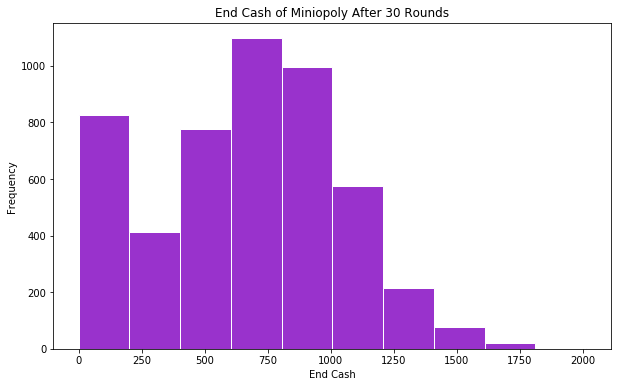

In [13]:
fig,ax = plt.subplots(1,1,figsize = (10,6))
ax.hist(endCash,
        facecolor = "darkorchid",
        edgecolor = "white")
ax.set_xlabel("End Cash")
ax.set_ylabel("Frequency")
ax.set_title("End Cash of Miniopoly After 30 Rounds");

**Part C**: Use your code from **Part A** to estimate the probability that a player goes bankrupt in the first 30 turns of the game. 

In [14]:
bankrupt = np.sum(endCash == 0)
print("There where {} bankrupt people by the end of 30 rounds. This is a probability of {} from all players.".format(bankrupt, bankrupt / sims))

There where 700 bankrupt people by the end of 30 rounds. This is a probability of 0.14 from all players.


**Part D**: Use your code from **Part A** to estimate the probability that a player goes bankrupt in the first 30 turns _given_ that they went to **Jail** at least once.  Is a player more or less likely to go bankrupt if they've been to **Jail**?  

In [15]:
# Similar to part B but also counting people going to jail
sims = 5000 # Initialize stuff
turns = 30
tempCash = 0
endCash = np.zeros(sims)
endCashGivenJail = []
totalJail = 0
for i in range(sims):
    tempCash = 200 # Reset cash and currentLoc at the beginning of every game
    currentLoc = 0
    jail = 0   # Make sure to reset jail variable to 0
    for j in range(turns):
        (currentLoc, tempCash) = miniopoly_turn(currentLoc, tempCash) # Play the game for 30 rounds
        if (currentLoc == 30 and jail == 0): # If they ever go to jail
            jail = 1
            totalJail += 1
        endCash[i] = tempCash
    if (jail == 1): # After all rounds, check if they went to jail. Add their endCash to the list if they did
        endCashGivenJail.append(tempCash)

In [16]:
# Find the number of people that went to Jail given they were bankrupt
totalBankruptGivenJail = 0
for i in endCashGivenJail:
    if i == 0:
        totalBankruptGivenJail += 1
probBankruptGivenJail = totalBankruptGivenJail / len(endCashGivenJail)
print("{} people went to jail given they went bankrupt. That is {:0.6} of the total number of people who went bankrupt.".format(totalBankruptGivenJail, probBankruptGivenJail))

538 people went to jail given they went bankrupt. That is 0.205265 of the total number of people who went bankrupt.


**Part E**: Use your code from **Part A** to estimate the probability (either directly or using Bayes' Rule) that a player has gone to jail at least once, given that the player went bankrupt in the first 30 turns.

In [17]:
totalBankrupt = np.sum(endCash == 0) # Find the total number of people who went bankrupt out of all simulations
probBankrupt = totalBankrupt / sims # P(Bankrupt) is the number of people bankrupt of entire sampleset
probJail = totalJail / sims # P(Jail) is the total number of people who went to jail from entire
# Bayes Rule: P(Jail(J)|Bankrupt(B)) = P(B|J)P(J) / P(B)
# P(B|J) is probBankruptGivenJail from above cell
probJailGivenBankrupt = probBankruptGivenJail * probJail / probBankrupt
print("The probability that a person went to Jail given they end up bankrupt is {:0.6}.".format(probJailGivenBankrupt))

The probability that a person went to Jail given they end up bankrupt is 0.716378.


***
<a/ id='p5'></a>
[Back to top](#top)

### [20 points] Problem 5

Suppose you roll two fair six-sided dice.  Let $C$ be the event that the two rolls are _close_ to one another in value, in the sense that they're either equal or differ by only 1.  

**Part A**: Compute $P(C)$ by hand. 


Of the possible 36 rolls, 16 of them are the same or differ by 1. Because all the rolls are fair, $P(C) = \frac{16}{36} \approx 0.4444$.

**Part B**: Write a simulation to run many trials (at least 10,000) of the pair of rolls and estimate the value of $P(C)$ you calculated in **Part A**.  Does your estimate agree with the exact calculation you did in **Part A**?  If not, try increasing the number of trials in your simulation. 

In [18]:
def FindCloseness (trials):
    die = [1,2,3,4,5,6]
    # trials = 50000
    sumClose = 0.0
    probs = np.zeros(trials);
    firstRoll = np.random.choice(die, trials)
    secondRoll = np.random.choice(die, trials)
    closeness = firstRoll - secondRoll
    for i in range(trials):
        if (closeness[i] <= 1 and closeness[i] >= -1):
            sumClose += 1
        probs[i] = (sumClose / (i+1))
    return(probs)

**Part C**: In the in-class notebook associated with Lecture 4 (nb04) we plotted a running estimate of the probability of an event as a function of the number of trials in our simulation.  Write code to run at least 10 independent simulations of at least 50,000 trials each to estimate $P(C)$ and plot their running estimate curves on the same set of axes. **Hint**: This is a lot of computation, so try to leverage Numpy as much as possible so that your code doesn't run forever. 

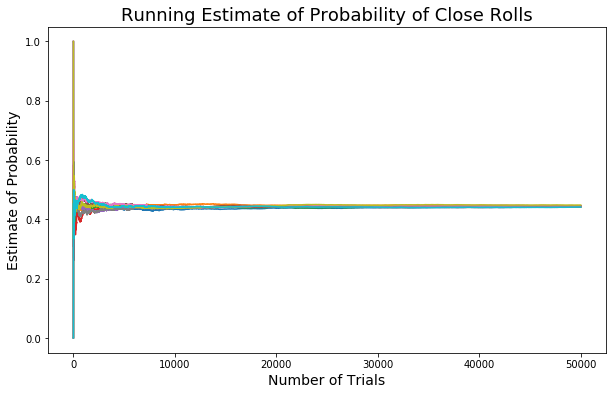

In [19]:
fig,ax = plt.subplots(1,1,figsize = (10,6)) # Creating the graph
sims = 10 # 10 independent simulations
trials = 50000 # Each simulation has 50,000 trials
p = np.zeros(trials)

for i in range(sims):
    p = FindCloseness(trials)
    ax.plot(p) 
ax.set_xlabel("Number of Trials", fontsize = 14)
ax.set_ylabel("Estimate of Probability", fontsize = 14)
ax.set_title("Running Estimate of Probability of Close Rolls", fontsize = 18);

**Part D**: Comment on the behavior of the running estimates as the number of trials increases. 

From the plot above, it can be seen that the probability is very inaccurate for the first few trials. As the number of trials increase, the probability begins to converge towards the correct value. This behavior is true for all estimates, that the simulated probability becomes more accurate as more trials are performed.

***
<a/ id='ch'></a>
[Back to top](#top)

### Challenge Problem - Night Falls. A Storm Rolls In. Can You Cross The River?

In every homework assignment we'll give you a Challenge Problem.  Challenge Problems never need to be turned in (and in fact, will not be graded) but we encourage you to give them a shot (after completing the required homework problems) and discuss them with your classmates and your instructors. 

This Challenge Problem was a [Riddler](https://fivethirtyeight.com/tag/the-riddler/) on [FiveThirtyEight](https://fivethirtyeight.com) a few years back. 

You’re on the north shore of a river, and want to cross to the south, via a series of 13 bridges and six islands, which you can see in the diagram below. But, as you approach the water, night falls, a bad storm rolls in, and you’re forced to wait until morning to try to cross. Overnight, the storm could render some of the bridges unusable — it has a 50 percent chance of knocking out each of the bridges. (The chance is independent for each bridge.)

<br>

![alt text](https://espnfivethirtyeight.files.wordpress.com/2016/01/roeder-riddler-diagram-11.png?w=575&h=449&quality=90&strip=info)

<br>

What’s the probability you will be able to cross the river in the morning? (You have no boat, can’t swim, can’t fix the bridges, etc. No tricks.)